In [1]:
import pandas as pd
from func import cal_buoyancy
import glob
import os
import re
import traceback
import datetime
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, SkewT
from scipy.interpolate import interp1d
from scipy.optimize import bisect
import numpy as np
import pickle
import numpy as np
import math
import pint
from pydoc import help
import xarray as xr
import netCDF4 as nc
import re
import matplotlib.pyplot as plt
from numpy import load
from numpy import asarray
from numpy import save
import pytz
from scipy import stats
from sklearn.linear_model import LinearRegression
from collections import Counter
import pymannkendall as mk
%matplotlib inline

In [2]:
with open('soundings_fig2&3.pkl', 'rb') as file:
    
    soundings = pickle.load(file)

soundings.shape

(2384, 8)

In [44]:
apes = soundings[soundings['APE'] == True]

wetapes = apes[apes['wet_coupling']==True]

wetapes_highp = apes[(apes['wet_coupling']==True) & (apes['afternoon']/7 < 0.14)]

wetapes_highp.shape[0]/wetapes.shape[0], wetapes_highp.shape[0]

(0.5128205128205128, 40)

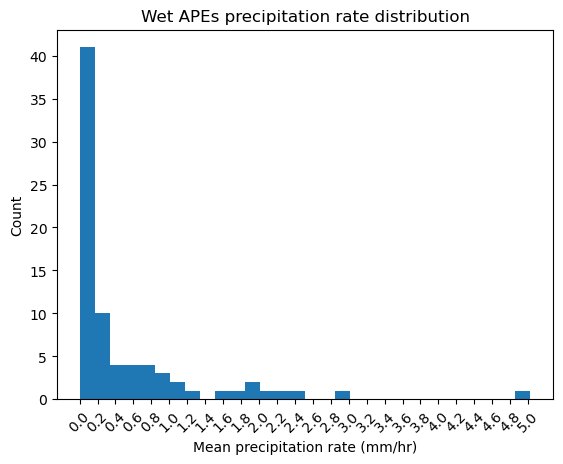

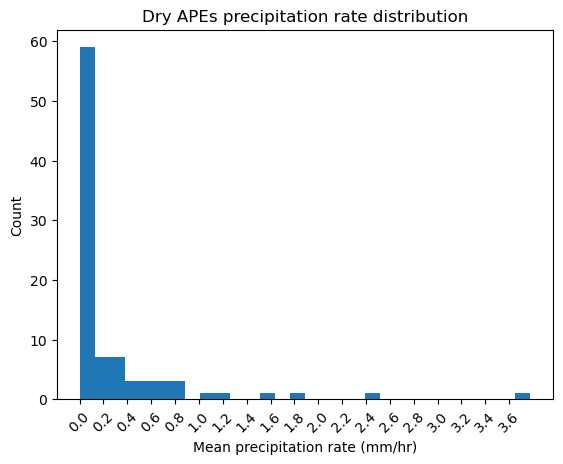

In [33]:
# Filter rows where 'APE' is True

# Function to plot histograms
def plot_histogram(data, title):
    
    plt.xticks(np.arange(np.min(data), np.max(data), 0.2), rotation=45)
    
    plt.title(title)
    
    plt.xlabel("Mean precipitation rate (mm/hr)")
    
    plt.ylabel("Count")
    
    plt.hist(data, bins=30)
    
    plt.show()

# Calculate and plot for wet APEs
wetaft = apes[apes['wet_coupling'] == True]['afternoon'] / 7

plot_histogram(wetaft, "Wet APEs precipitation rate distribution")

# Calculate and plot for dry APEs
dryaft = apes[apes['dry_coupling'] == True]['afternoon'] / 7

plot_histogram(dryaft, "Dry APEs precipitation rate distribution")